# Calcula anomalia por mês

In [1]:
import time

In [26]:
%%time
# importa bibliotecas
import salem
import glob
import xarray as xr
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# leitura do shapefile do Brasil
shapefile_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')

# lista dos arquivos
files = sorted(glob.glob(f'output/05_netcdf_focos_por_mes/focos_mensal_brasil_*.nc')) # focos_mensal_brasil_AQUA_2023.nc

# leitura dos arquivos por ano
focos_por_mes = xr.open_mfdataset(files, concat_dim='time', combine='nested')

# coloca "NaN" onde os "focos=0"
condicao = focos_por_mes['focos'][:,:,:] == 0
focos_por_mes['focos'][:,:,:] = np.where(condicao, np.nan, focos_por_mes['focos'][:,:,:])

## EXEMPLO: 
#udel_air_AS_clima = udel_air_AS.groupby('time.month').mean('time')
#anom_air_AS = udel_air_AS.groupby('time.month') - udel_air_AS_clima
# calculando a CLIMATOLOGIA: 2003-2023
climatologia = focos_por_mes.groupby('time.month').mean(dim='time')

# calculando a ANOMALIA
anomalia = focos_por_mes.groupby('time.month') - climatologia

# recorta o dado para região
climatologia = climatologia.salem.roi(shape=shapefile_brasil)
anomalia = anomalia.salem.roi(shape=shapefile_brasil)

CPU times: total: 7 s
Wall time: 12.6 s


In [27]:
focos_por_mes

<xarray.Dataset>
Dimensions:  (time: 262, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * time     (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2024-10-01
Data variables:
    focos    (time, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>

In [28]:
climatologia

<xarray.Dataset>
Dimensions:  (month: 12, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    focos    (month, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [29]:
anomalia

<xarray.Dataset>
Dimensions:  (time: 262, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * time     (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2024-10-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 12 1 2 3 4 5 6 7 8 9 10
Data variables:
    focos    (time, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [30]:
print(len(files))

262


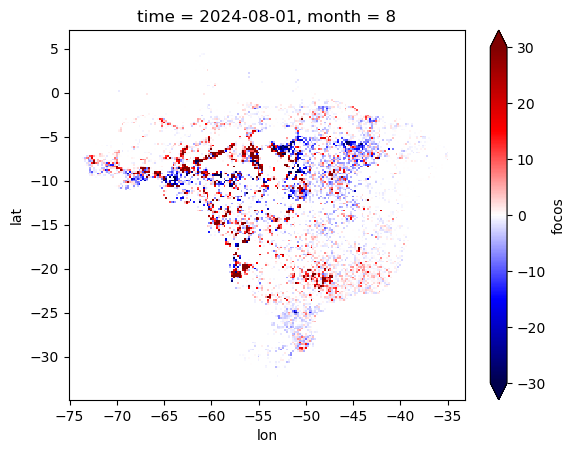

In [36]:
anomalia['focos'].loc['2024-08-01'].salem.roi(shape=shapefile_brasil).plot(vmin=-30, vmax=30, cmap='seismic')

# Plota figura - `BRASIL`

In [34]:
anomalia

<xarray.Dataset>
Dimensions:  (time: 262, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * time     (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2024-10-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 12 1 2 3 4 5 6 7 8 9 10
Data variables:
    focos    (time, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

Processando ===>>> 0-2024-01
Processando ===>>> 1-2024-02
Processando ===>>> 2-2024-03
Processando ===>>> 3-2024-04
Processando ===>>> 4-2024-05
Processando ===>>> 5-2024-06
Processando ===>>> 6-2024-07
Processando ===>>> 7-2024-08
Processando ===>>> 8-2024-09
Processando ===>>> 9-2024-10
CPU times: total: 51.2 s
Wall time: 1min 18s


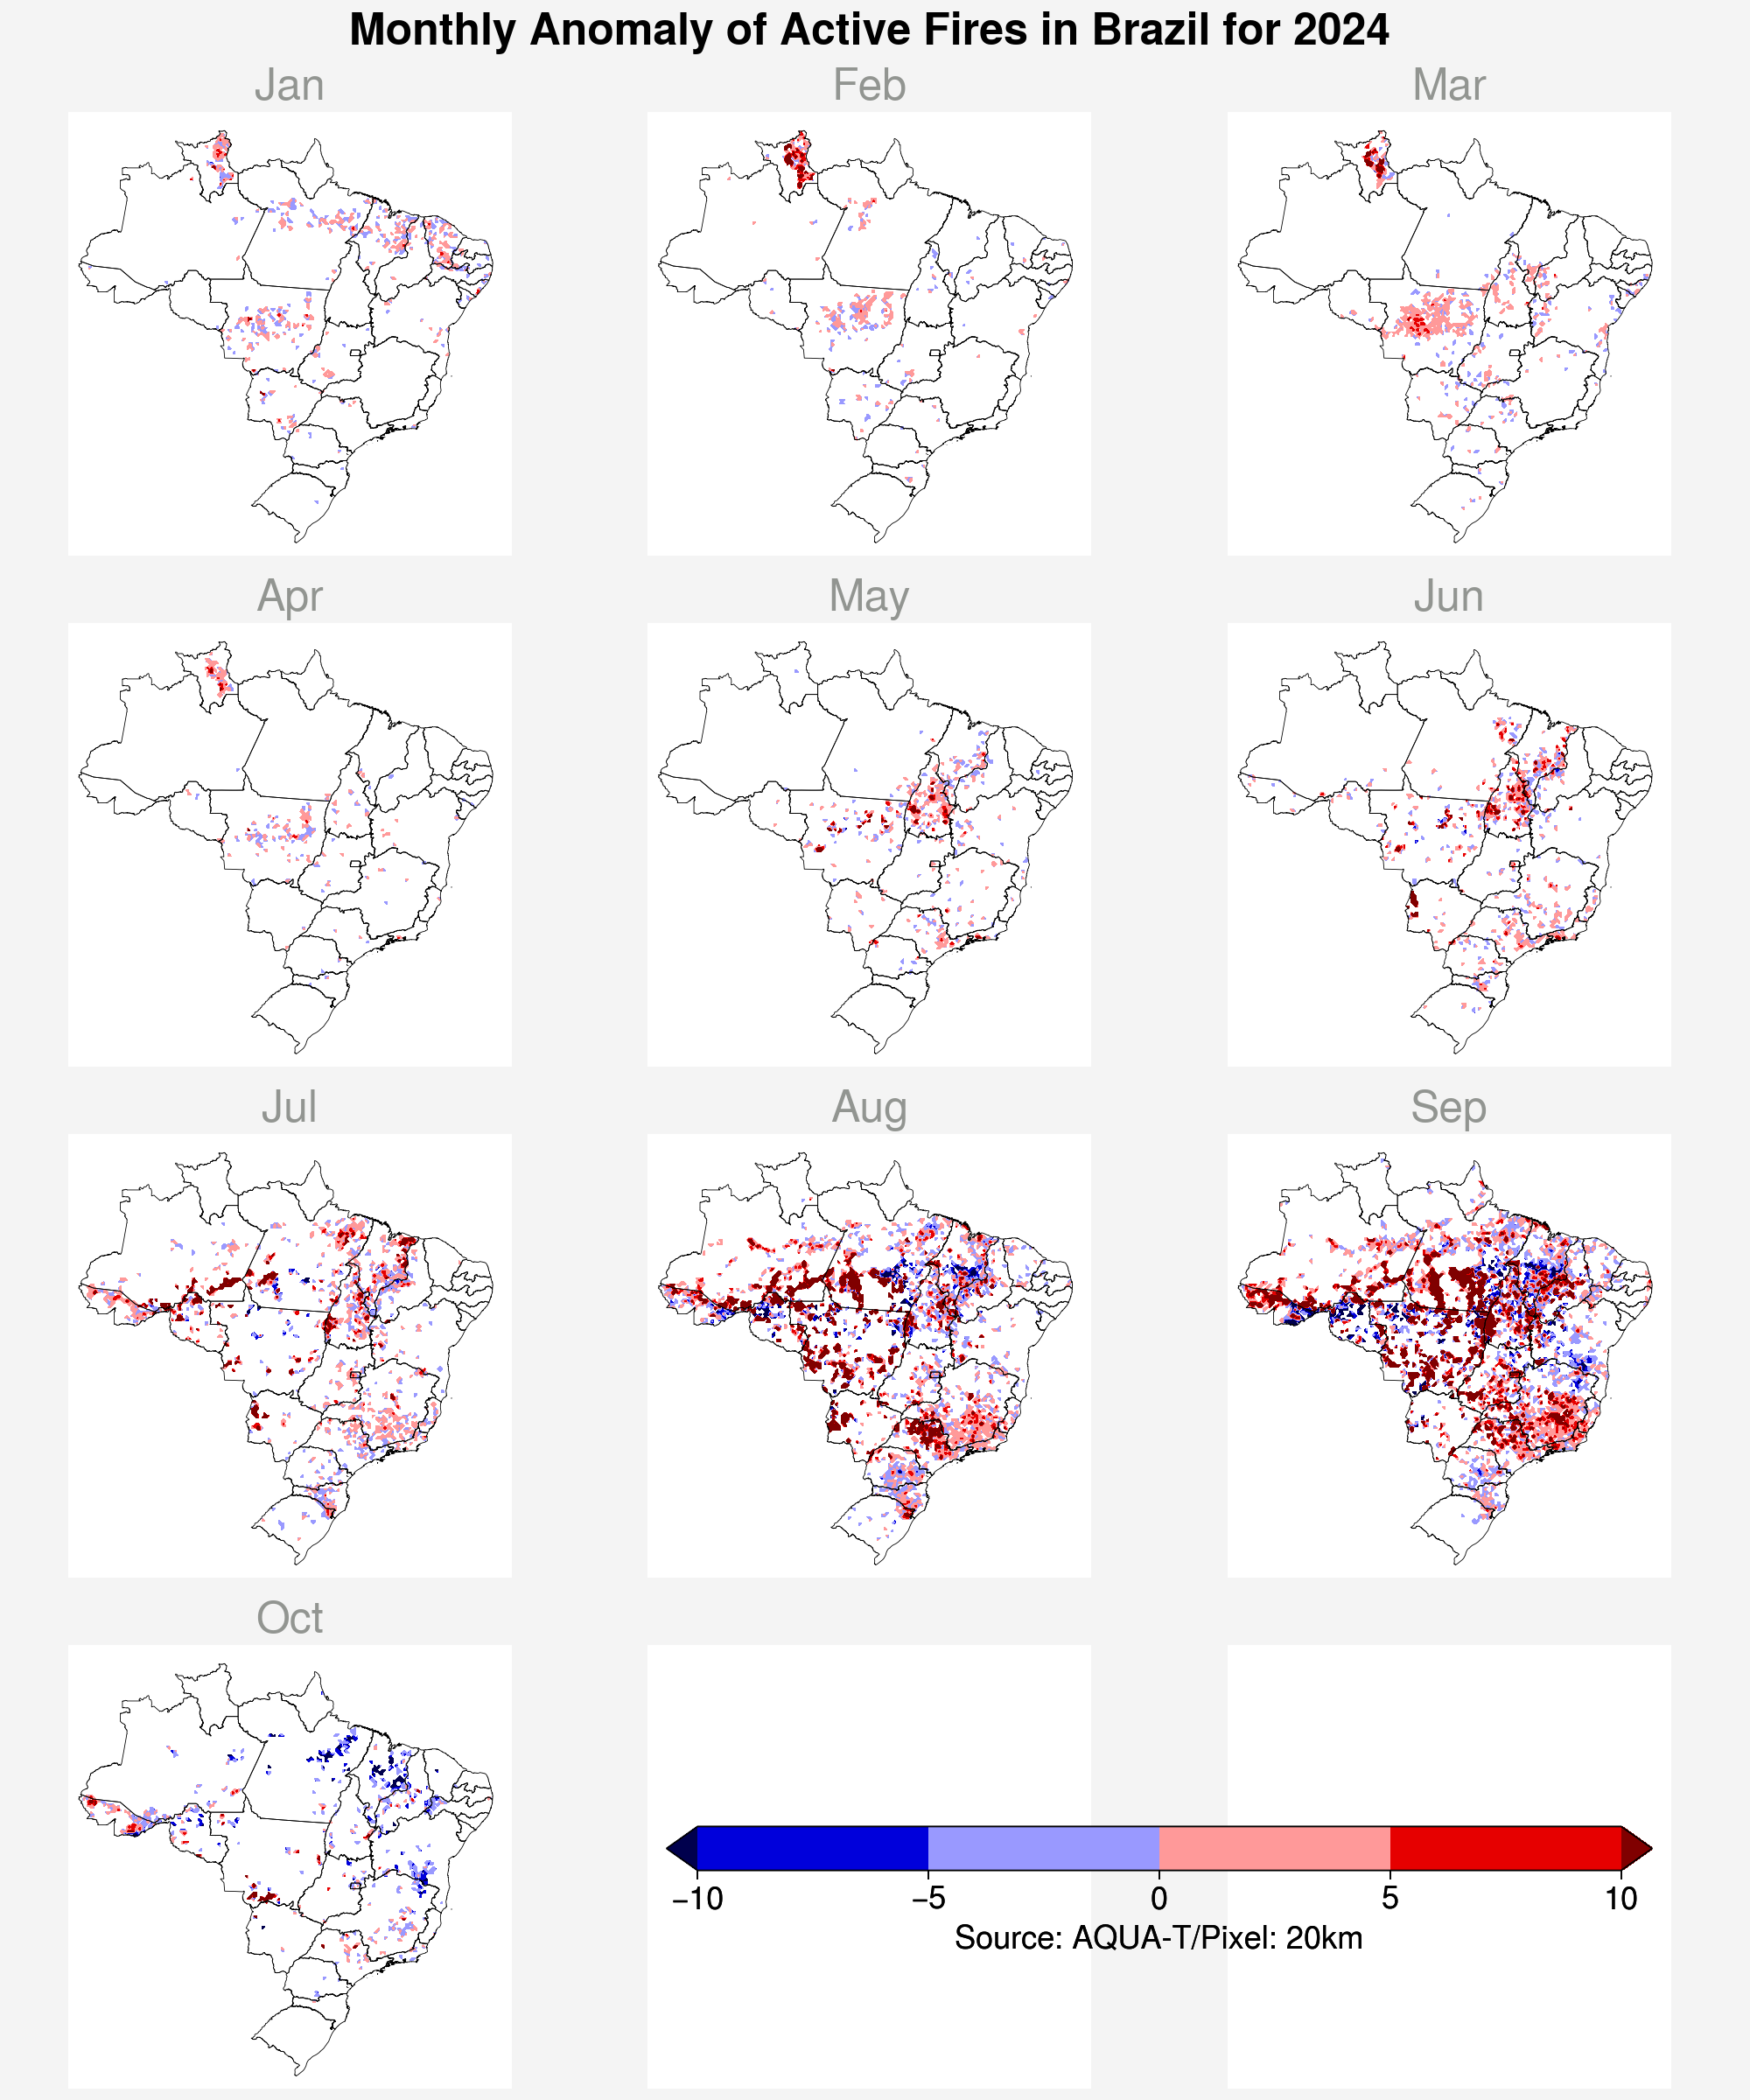

In [51]:
%%time
# import bibliotecas
import proplot as pplt
import cartopy.io.shapereader as shpreader
import cartopy, cartopy.crs as ccrs  
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# meses
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10, 12), 
                        nrows=4, ncols=3, 
                        tight=True, 
                        proj='pcarree', 
                        sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Monthly Anomaly of Active Fires in Brazil for 2024',
          small='20px', large='25px',
          linewidth=0, grid=False)

# loop dos meses de 2024
i=0
for data in pd.date_range('20240101', '20241031', freq='1M'):

    # estrai ano e mês
    ano = data.strftime('%Y')
    mes = data.strftime('%m')

    print('Processando ===>>>', f'{i}-{ano}-{mes}')

    # plota figura
    map1 = ax[i].contourf(anomalia['lon'],
                          anomalia['lat'],
                          anomalia['focos'].loc[f'{ano}-{mes}-01'],
                          cmap='seismic',
                          vmin=-10, vmax=10,
                          levels=pplt.arange(-10, 10, 5),
                          extend='both')

    # plota titulo de cada figura
    mesint = int(mes)
    ax[i].format(title=f'{meses[mesint-1]}', labels = False, titleloc='c', titlecolor='grey')
    
    # plota contornos. Tempo= 9min 10s
    #estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')
    #estados_brasil.plot(edgecolor='black', facecolor='none', linewidth=0.5, alpha=1, ax=ax[i])

    # ou. Tempo=2min 43s
    shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp').geometries())
    ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    i+=1

# plota barra de cores da figura
fig.colorbar(map1, 
             loc='b',
             label='Source: AQUA-T/Pixel: 20km', 
             ticks=5, 
             ticklabelsize=13, 
             labelsize=13, 
             length=0.85, 
             width=0.25,
             space=-12,
             cols=(2,3))

# salva figura
fig.savefig('output/06_figuras_anomalia_mensal/anomalia_focos_mensal_2024_brasil.jpg', transparent=True, dpi=300, bbox_inches="tight")

# Plota figura - `SÃO PAULO`

In [52]:
# leitura do shapefile de SP
shapefile_sp = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp')

# recorta o dado para região
anomalia = anomalia.salem.roi(shape=shapefile_sp)
climatologia = climatologia.salem.roi(shape=shapefile_sp)

Processando ===>>> 0-2024-01
Processando ===>>> 1-2024-02
Processando ===>>> 2-2024-03
Processando ===>>> 3-2024-04
Processando ===>>> 4-2024-05
Processando ===>>> 5-2024-06
Processando ===>>> 6-2024-07
Processando ===>>> 7-2024-08
Processando ===>>> 8-2024-09
Processando ===>>> 9-2024-10
CPU times: total: 6.19 s
Wall time: 11.8 s


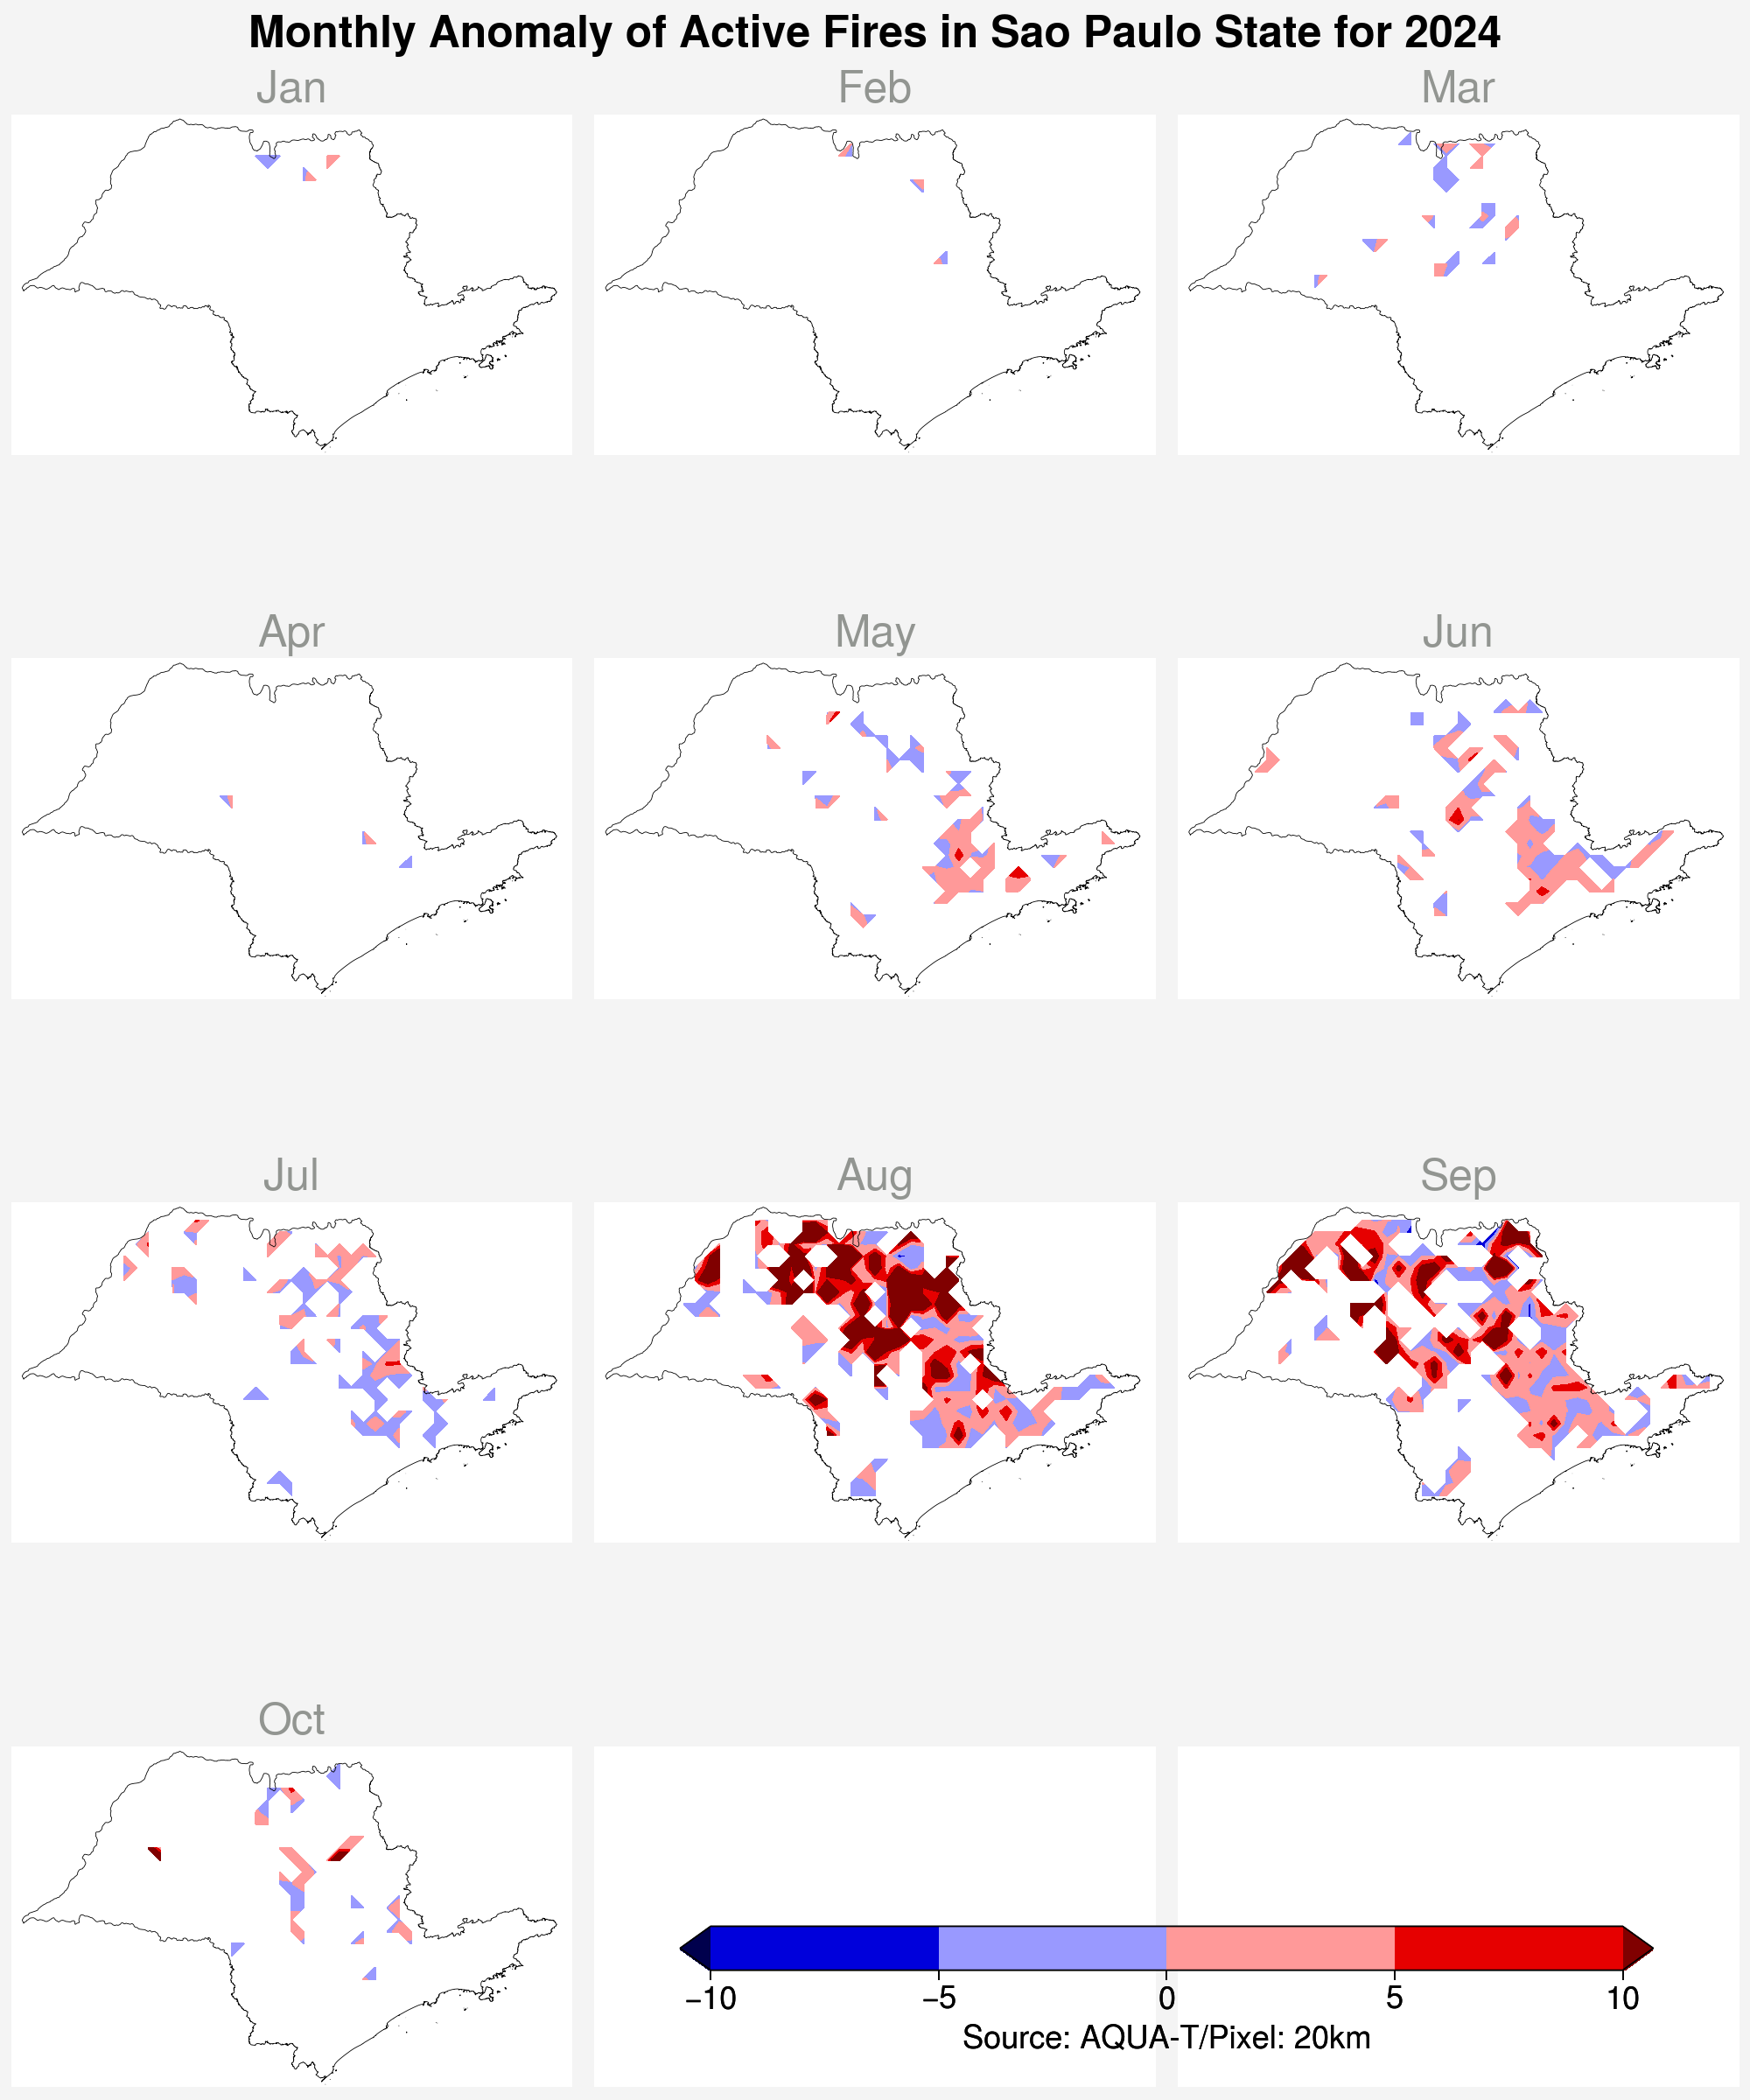

In [54]:
%%time
# import bibliotecas
import proplot as pplt
import cartopy.io.shapereader as shpreader
import cartopy, cartopy.crs as ccrs  
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Limites de SP
lonmin, lonmax, latmin, latmax = -53.3, -43.9, -25.4, -19.7

# meses
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10, 12), 
                        nrows=4, ncols=3, 
                        tight=True, 
                        proj='pcarree', 
                        sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Monthly Anomaly of Active Fires in Sao Paulo State for 2024',
          small='20px', large='25px',
          linewidth=0, grid=False)

# loop dos meses de 2024
i=0
for data in pd.date_range('20240101', '20241031', freq='1M'):

    # estrai ano e mês
    ano = data.strftime('%Y')
    mes = data.strftime('%m')

    print('Processando ===>>>', f'{i}-{ano}-{mes}')

    # plota figura
    map1 = ax[i].contourf(anomalia['lon'],
                          anomalia['lat'],
                          anomalia['focos'].loc[f'{ano}-{mes}-01'],
                          cmap='seismic',
                          vmin=-10, vmax=10,
                          levels=pplt.arange(-10, 10, 5),
                          extend='both')

    # plota titulo de cada figura
    mesint = int(mes)
    ax[i].format(title=f'{meses[mesint-1]}', labels = False, titleloc='c', titlecolor='grey')
    
    # plota contornos. Tempo= 9min 10s
    #estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp')
    #estados_brasil.plot(edgecolor='black', facecolor='none', linewidth=0.5, alpha=1, ax=ax[i])

    # ou. Tempo=2min 43s
    shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp').geometries())
    ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    i+=1

# plota barra de cores da figura
fig.colorbar(map1, 
             loc='b',
             label='Source: AQUA-T/Pixel: 20km', 
             ticks=5, 
             ticklabelsize=13, 
             labelsize=13, 
             length=0.85, 
             width=0.25,
             space=-12,
             cols=(2,3))

# salva figura
fig.savefig('output/06_figuras_anomalia_mensal/anomalia_focos_mensal_2024_sp.jpg', transparent=True, dpi=300, bbox_inches="tight")